# Enrich Data

Take the raw HackerNews data and do basic processing:

* Remove dead and deleted comments
* Find the root comment
* Split by the root comment
* Clean the comment text

In [1]:
%cd ..

/home/bookfinder


In [2]:
import pandas as pd

from bookfinder.transform import clean_text, enrich_root, hash_bucket

# Read in the raw data

In [3]:
def read_hn_data(path):
    df = (
        pd.read_parquet(path)
        .set_index("id")
        .assign(parent=lambda df: df["parent"].astype("Int64"))
        .query("dead.isna() & deleted.isna()")
    )
    return df

In [4]:
df = read_hn_data('./data/01_raw/hackernews2021.parquet')
df

,title,url,text,dead,by,score,time,timestamp,type,parent,descendants,ranking,deleted
id,,,,,,,,,,,,,
27405131,None,None,They didn&#x27;t say they <i>weren&#x27;t</i> ...,None,chrisseaton,NaN,1622901869,2021-06-05 14:04:29+00:00,comment,27405089,NaN,NaN,None
27814313,None,None,"Check out <a href=""https:&#x2F;&#x2F;www.remno...",None,noyesno,NaN,1626119705,2021-07-12 19:55:05+00:00,comment,27812726,NaN,NaN,None
28626089,None,None,Like a million-dollars pixel but with letters....,None,alainchabat,NaN,1632381114,2021-09-23 07:11:54+00:00,comment,28626017,NaN,NaN,None
27143346,None,None,Not the question...,None,SigmundA,NaN,1620920426,2021-05-13 15:40:26+00:00,comment,27143231,NaN,NaN,None
29053108,None,None,There’s the Unorganized Militia of the United ...,None,User23,NaN,1635636573,2021-10-30 23:29:33+00:00,comment,29052087,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27367848,None,None,Housing supply isn’t something that can’t chan...,None,JCM9,NaN,1622636746,2021-06-02 12:25:46+00:00,comment,27367172,NaN,NaN,None
28052800,None,None,Final Fantasy XIV has been experiencing consta...,None,amyjess,NaN,1628017217,2021-08-03 19:00:17+00:00,comment,28050798,NaN,NaN,None
28052805,None,None,How did you resolve it?,None,8ytecoder,NaN,1628017238,2021-08-03 19:00:38+00:00,comment,28049375,NaN,NaN,None


In [5]:
df = enrich_root(df)
df['clean_text'] = df['text'].fillna('').apply(clean_text)
df["bucket"] = df["root"].astype(float).apply(hash_bucket)

## Length distribution

In [6]:
df['text_length'] = df['clean_text'].str.len()

In [7]:
(df['text_length'] == 0).mean()

0.07129066143222758

<AxesSubplot: >

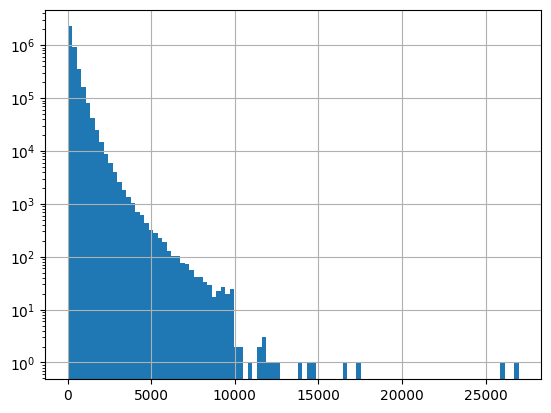

In [8]:
df['text_length'].hist(log=True, bins=100)

# Save the data

In [9]:
df.to_parquet('data/02_intermediate/hn_enriched.parquet')